In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Data Loading and Validation

### Load in Labels From The Labels File

In [2]:
label_file="species_13_labels.txt"
spec_labels = [line.strip() for line in open(label_file)]

#### For each row, use the file's path to extract its 'true' label and add it to the row.  Anything unrecognized mark as Unknown

In [3]:
def getLabelFromPath(p):
    pieces=p.split('/')
    apparent=[p for p in pieces if p in spec_labels]
    #return the right-most apparent match
    if(len(apparent)==0):
        raise Exception("Label for "+str(pieces)+" is Unknown!\n\n")
        return "Unknown"
    elif(len(apparent))==1:
        return apparent[0]
    else:
        return apparent[-1]

In [4]:
results_df=pd.read_csv('report_db.tsv', sep='\t',header=0)
print(results_df.columns)

Index(['run_id', 'file_id', 'model_name', 'result', 'start_time', 'end_time',
       'file'],
      dtype='object')


In [5]:
file_labels=results_df['file'].apply(getLabelFromPath)

In [6]:
results_df['file_labels']=file_labels

### Apply str.strip to the predictions (whitespace at ends not enforced on the directory paths would otherwise mean 'Bongo ' doesn't match 'Bongo')

In [7]:
results_df['result']=results_df['result'].apply(lambda x:x.strip())

In [8]:
results_df.head()

,run_id,file_id,model_name,result,start_time,end_time,file,file_labels
0,2020-11-18T00:22:43.134Z,0,exception_louis_direct,Cheetah,2020-11-18T00:22:43.203Z,2020-11-18T00:22:44.017Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-2.jpg,Cheetah
1,2020-11-18T00:22:43.134Z,0,Inception_louis_direct,Cheetah,2020-11-18T00:22:44.024Z,2020-11-18T00:22:45.223Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-2.jpg,Cheetah
2,2020-11-18T00:22:43.134Z,0,nasnet_louis_direct,Cheetah,2020-11-18T00:22:45.229Z,2020-11-18T00:22:52.568Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-2.jpg,Cheetah
3,2020-11-18T00:22:43.134Z,1,exception_louis_direct,Cheetah,2020-11-18T00:22:52.622Z,2020-11-18T00:22:53.250Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-1.jpg,Cheetah
4,2020-11-18T00:22:43.134Z,1,Inception_louis_direct,Cheetah,2020-11-18T00:22:53.259Z,2020-11-18T00:22:54.017Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-1.jpg,Cheetah


### Make sure that each file label is a recognized label by checking the list

In [9]:
known_label_results=results_df[results_df.apply(lambda x: x['file_labels'] !="Unknown", axis=1)]
if(known_label_results.shape[0]==results_df.shape[0]):
    print("All rows accounted for with no unknown file labels!")
else:
    raise Excpetion("Some unknown labels!")

All rows accounted for with no unknown file labels!


###  Make sure that each of the results (predictions) and each of the true labels are in the list of labels.

Count and show anything not recognized!  If anything is unrecognized raise an Exception.  Otherwise counts regarding classifier performance could be incorrect

In [10]:
recognized_results=known_label_results.apply(lambda x:x['result'] in spec_labels,axis=1)
recognized_file_labels=known_label_results.apply(lambda x:x['file_labels'] in spec_labels,axis=1)
known_label_results['recognize_result']=recognized_results
known_label_results['recognized_file_labels']=recognized_file_labels

In [11]:
pd.set_option('display.max_rows', 1080)
any_unknown_labels=known_label_results[known_label_results.apply(lambda x:x['recognize_result']==False or x['recognized_file_labels']==False,axis=1)]
ur_flag=False
if(any_unknown_labels.shape[0]>0):
    print("Unknown labels!")
    print(any_unknown_labels)
    ur_flag=True
pd.set_option('display.max_rows', 10)
if(ur_flag):
    raise Exception("Unrecognized labels in either result or in file_labels!")

# Initial Results Review

Counts of correct/incorrect by comparing predictions with labels

In [12]:
correct_rows=known_label_results[known_label_results.apply(lambda x:x['result'].lower()==x['file_labels'].lower(),axis=1)]
incorrect_rows=known_label_results[known_label_results.apply(lambda x:x['result'].lower()!=x['file_labels'].lower(),axis=1)]

In [13]:
correct_rows

,run_id,file_id,model_name,result,start_time,end_time,file,file_labels,recognize_result,recognized_file_labels
0,2020-11-18T00:22:43.134Z,0,exception_louis_direct,Cheetah,2020-11-18T00:22:43.203Z,2020-11-18T00:22:44.017Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-2.jpg,Cheetah,True,True
1,2020-11-18T00:22:43.134Z,0,Inception_louis_direct,Cheetah,2020-11-18T00:22:44.024Z,2020-11-18T00:22:45.223Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-2.jpg,Cheetah,True,True
2,2020-11-18T00:22:43.134Z,0,nasnet_louis_direct,Cheetah,2020-11-18T00:22:45.229Z,2020-11-18T00:22:52.568Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-2.jpg,Cheetah,True,True
3,2020-11-18T00:22:43.134Z,1,exception_louis_direct,Cheetah,2020-11-18T00:22:52.622Z,2020-11-18T00:22:53.250Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-1.jpg,Cheetah,True,True
4,2020-11-18T00:22:43.134Z,1,Inception_louis_direct,Cheetah,2020-11-18T00:22:53.259Z,2020-11-18T00:22:54.017Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-1.jpg,Cheetah,True,True
...,...,...,...,...,...,...,...,...,...,...
1070,2020-11-18T00:22:43.134Z,356,nasnet_louis_direct,White Rhino,2020-11-18T00:53:44.532Z,2020-11-18T00:53:48.549Z,Louis_Data/Test/White Rhino/U Kalakwa Cs6/2Jun...,White Rhino,True,True
1071,2020-11-18T00:22:43.134Z,357,exception_louis_direct,White Rhino,2020-11-18T00:53:48.600Z,2020-11-18T00:53:49.142Z,Louis_Data/Test/White Rhino/F Ot Wilna/AGF0002...,White Rhino,True,True
1072,2020-11-18T00:22:43.134Z,357,Inception_louis_direct,White Rhino,2020-11-18T00:53:49.146Z,2020-11-18T00:53:49.816Z,Louis_Data/Test/White Rhino/F Ot Wilna/AGF0002...,White Rhino,True,True
1073,2020-11-18T00:22:43.134Z,357,nasnet_louis_direct,White Rhino,2020-11-18T00:53:49.821Z,2020-11-18T00:53:53.790Z,Louis_Data/Test/White Rhino/F Ot Wilna/AGF0002...,White Rhino,True,True


In [14]:
incorrect_rows

,run_id,file_id,model_name,result,start_time,end_time,file,file_labels,recognize_result,recognized_file_labels
5,2020-11-18T00:22:43.134Z,1,nasnet_louis_direct,Jaguar,2020-11-18T00:22:54.023Z,2020-11-18T00:22:58.201Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-1.jpg,Cheetah,True,True
8,2020-11-18T00:22:43.134Z,2,nasnet_louis_direct,Jaguar,2020-11-18T00:22:59.483Z,2020-11-18T00:23:03.508Z,Louis_Data/Test/Cheetah/M Alvin/Alvin.jpg,Cheetah,True,True
11,2020-11-18T00:22:43.134Z,3,nasnet_louis_direct,Puma,2020-11-18T00:23:04.720Z,2020-11-18T00:23:08.765Z,Louis_Data/Test/Cheetah/F Kinky tail/DSCF1262.JPG,Cheetah,True,True
20,2020-11-18T00:22:43.134Z,6,nasnet_louis_direct,Puma,2020-11-18T00:23:20.556Z,2020-11-18T00:23:25.184Z,Louis_Data/Test/Cheetah/M Pano/Pano-1.JPG,Cheetah,True,True
26,2020-11-18T00:22:43.134Z,8,nasnet_louis_direct,Leopard,2020-11-18T00:23:31.695Z,2020-11-18T00:23:35.666Z,Louis_Data/Test/Cheetah/F Julia/LH4M [50_].JPG,Cheetah,True,True
...,...,...,...,...,...,...,...,...,...,...
1074,2020-11-18T00:22:43.134Z,358,exception_louis_direct,Black Rhino,2020-11-18T00:53:53.860Z,2020-11-18T00:53:54.383Z,Louis_Data/Test/White Rhino/F Kalakwa Cs10/1Ju...,White Rhino,True,True
1075,2020-11-18T00:22:43.134Z,358,Inception_louis_direct,Black Rhino,2020-11-18T00:53:54.388Z,2020-11-18T00:53:55.037Z,Louis_Data/Test/White Rhino/F Kalakwa Cs10/1Ju...,White Rhino,True,True
1076,2020-11-18T00:22:43.134Z,358,nasnet_louis_direct,Black Rhino,2020-11-18T00:53:55.042Z,2020-11-18T00:53:59.016Z,Louis_Data/Test/White Rhino/F Kalakwa Cs10/1Ju...,White Rhino,True,True
1077,2020-11-18T00:22:43.134Z,359,exception_louis_direct,Black Rhino,2020-11-18T00:53:59.091Z,2020-11-18T00:53:59.624Z,Louis_Data/Test/White Rhino/F Kalakwa Cs10/1Ju...,White Rhino,True,True


# Confusion Matrix Across the Models 

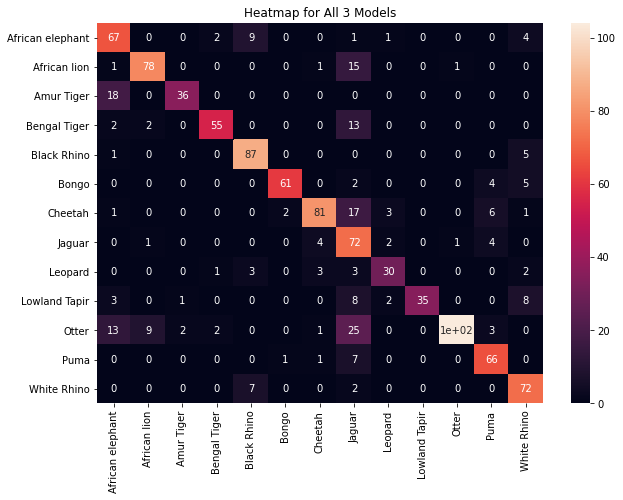

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_val_pred=known_label_results['result']
y_val=known_label_results['file_labels']
mat = confusion_matrix(y_val, y_val_pred)
df_cm = pd.DataFrame(mat, index = [i for i in spec_labels],columns = [i for i in spec_labels])
plt.figure(figsize = (10,7))
plt.title('Heatmap for All 3 Models')
sn.heatmap(df_cm, annot=True)
plt.show()

[844, 236]


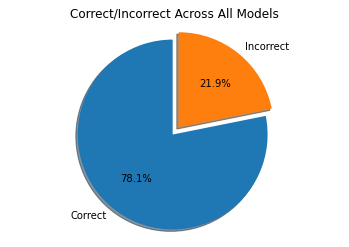

In [16]:
labels=['Correct','Incorrect']
explode = (0.1, 0)
sizes=[correct_rows.shape[0],incorrect_rows.shape[0]]
print(str(sizes))
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Correct/Incorrect Across All Models")
plt.show()

# Initial comparison and visualization by each of the 3 models

#### It seems that the NASNet model has problems in terms of accuracy and performance

For model exception_louis_direct
Model exception_louis_direct result rows : 360
Number correct : 337
Number incorrect : 23


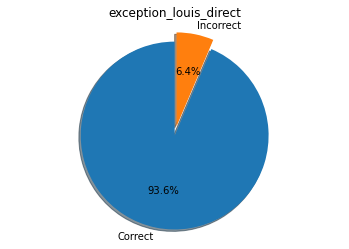

For model Inception_louis_direct
Model Inception_louis_direct result rows : 360
Number correct : 333
Number incorrect : 27


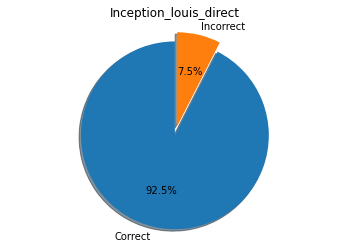

For model nasnet_louis_direct
Model nasnet_louis_direct result rows : 360
Number correct : 174
Number incorrect : 186


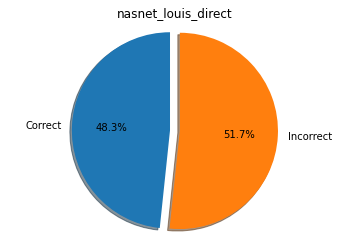

In [17]:
import matplotlib.pyplot as plt
model_names=['exception_louis_direct','Inception_louis_direct','nasnet_louis_direct']
for m in range(len(model_names)):
    print("For model "+model_names[m])
    this_model_rows=known_label_results[known_label_results.apply(lambda x:x['model_name']==model_names[m],axis=1)]
    print("Model "+model_names[m]+" result rows : "+str(this_model_rows.shape[0]))
    this_model_correct=this_model_rows[this_model_rows.apply(lambda x:x['result'].lower()==x['file_labels'].lower(),axis=1)]
    this_model_incorrect=this_model_rows[this_model_rows.apply(lambda x:x['result'].lower()!=x['file_labels'].lower(),axis=1)]
    num_this_model_correct=this_model_correct.shape[0]
    num_this_model_incorrect=this_model_incorrect.shape[0]
    print("Number correct : "+str(num_this_model_correct))
    print("Number incorrect : "+str(num_this_model_incorrect))
    fig1, ax1 = plt.subplots()
    explode = (0.1, 0) 
    labels=['Correct','Incorrect']
    sizes=[num_this_model_correct,num_this_model_incorrect]
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(model_names[m])
    plt.show()

# Model-Level Confusion Matrix Heatmaps Give Overviews of Model Performace

#### The NASNet model is an outlier in terms of performance, but its permance is much worse than the other models.

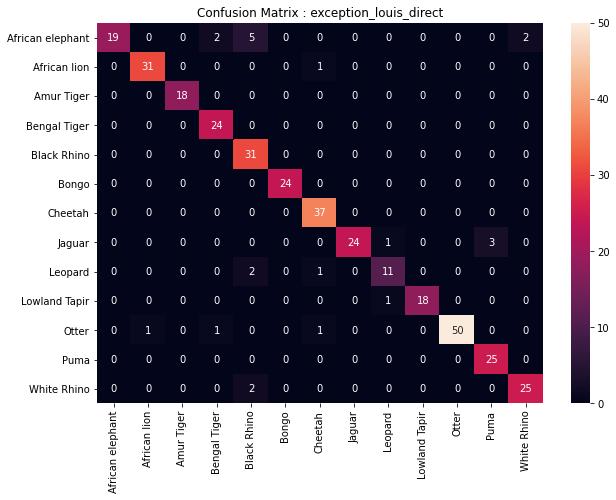

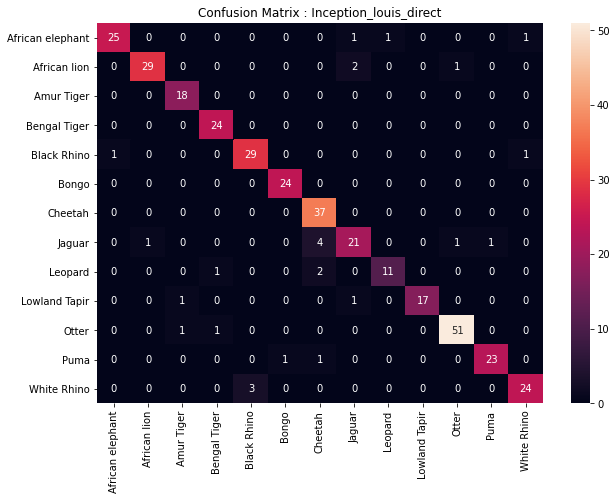

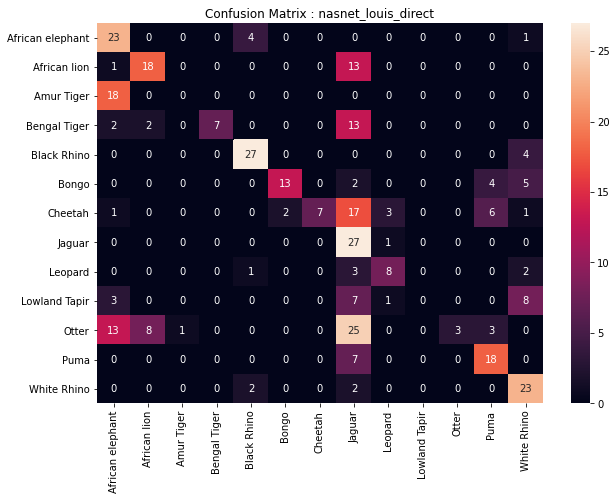

In [18]:
import matplotlib.pyplot as plt
model_names=['exception_louis_direct','Inception_louis_direct','nasnet_louis_direct']
for m in range(len(model_names)):
    this_model_rows=known_label_results[known_label_results.apply(lambda x:x['model_name']==model_names[m],axis=1)]
    y_val_pred=this_model_rows['result']
    y_val=this_model_rows['file_labels']
    mat = confusion_matrix(y_val, y_val_pred)
    df_cm = pd.DataFrame(mat, index = [i for i in spec_labels],columns = [i for i in spec_labels])
    plt.figure(figsize = (10,7))
    plt.title('Confusion Matrix : '+model_names[m])
    sn.heatmap(df_cm, annot=True)
    plt.show()

# Overview of Model Inference Execution Times

In [19]:
from datetime import datetime

def makeResultTimeSecondsSinceEpoch(d):
    #https://stackoverflow.com/questions/127803/how-do-i-parse-an-iso-8601-formatted-date/49784038#49784038
    #Obtain seconds since the epoch via parsing with 'fromisoformat'
    # Also, successful parsing is done without the Z suffix so the Z suffix is removed if it is found.
    if(d.endswith("Z")):
        d=d[0:len(d)-1]
    dt=datetime.fromisoformat(d)
    return dt.timestamp()

def getDuration(d1,d2):
    t1=makeResultTimeSecondsSinceEpoch(d1)
    t2=makeResultTimeSecondsSinceEpoch(d2)
    if(t2<=t1):
        raise Exception("Error, end precedes start?!?!")
    return t2-t1

In [20]:
known_label_results['duration']=known_label_results.apply(lambda x:getDuration(x['start_time'],x['end_time']),axis=1)

In [21]:
known_label_results.head()

,run_id,file_id,model_name,result,start_time,end_time,file,file_labels,recognize_result,recognized_file_labels,duration
0,2020-11-18T00:22:43.134Z,0,exception_louis_direct,Cheetah,2020-11-18T00:22:43.203Z,2020-11-18T00:22:44.017Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-2.jpg,Cheetah,True,True,0.814
1,2020-11-18T00:22:43.134Z,0,Inception_louis_direct,Cheetah,2020-11-18T00:22:44.024Z,2020-11-18T00:22:45.223Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-2.jpg,Cheetah,True,True,1.199
2,2020-11-18T00:22:43.134Z,0,nasnet_louis_direct,Cheetah,2020-11-18T00:22:45.229Z,2020-11-18T00:22:52.568Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-2.jpg,Cheetah,True,True,7.339
3,2020-11-18T00:22:43.134Z,1,exception_louis_direct,Cheetah,2020-11-18T00:22:52.622Z,2020-11-18T00:22:53.250Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-1.jpg,Cheetah,True,True,0.628
4,2020-11-18T00:22:43.134Z,1,Inception_louis_direct,Cheetah,2020-11-18T00:22:53.259Z,2020-11-18T00:22:54.017Z,Louis_Data/Test/Cheetah/M Alvin/Alvin-1.jpg,Cheetah,True,True,0.758


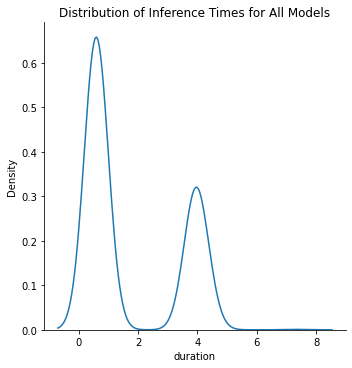

In [22]:
sn.displot(known_label_results, x="duration", kind="kde")
plt.title('Distribution of Inference Times for All Models')
plt.show()

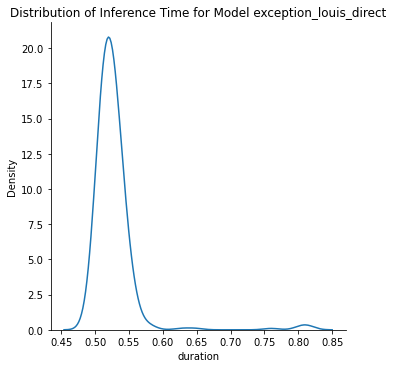

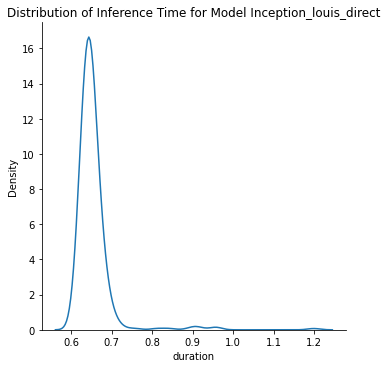

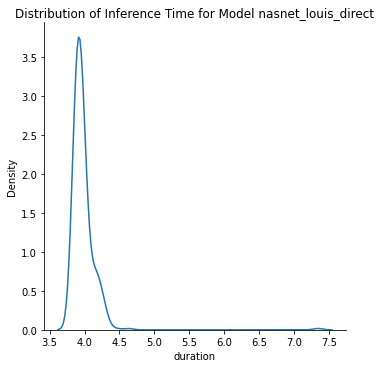

In [23]:
for m in range(len(model_names)):
    dp=sn.displot(known_label_results[known_label_results.apply(lambda x:x['model_name']==model_names[m],axis=1)], x="duration", kind="kde")
    plt.title('Distribution of Inference Time for Model '+model_names[m])

### Adjacent Plots of the Distribution of the Execution Timess of All the Models Help Demonstrates that NASNet is an outlier in terms of how long it takes to run

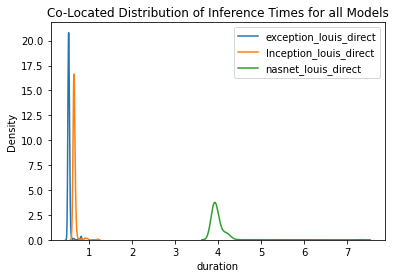

In [24]:
sn.kdeplot(known_label_results[known_label_results.apply(lambda x:x['model_name']==model_names[0],axis=1)]['duration'])
sn.kdeplot(known_label_results[known_label_results.apply(lambda x:x['model_name']==model_names[1],axis=1)]['duration'])
sn.kdeplot(known_label_results[known_label_results.apply(lambda x:x['model_name']==model_names[2],axis=1)]['duration'])
plt.legend(model_names)
plt.title('Co-Located Distribution of Inference Times for all Models')
plt.show()